# BUS32100, Week 4
# In-class exercise: data wrangling with `Pandas` using MTA data

Learning objectives:

* Understand basic methods for data quality checking and cleaning 
* Use visualization as an aid in exploring data quality 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Import and check the data

Import the csv of MTA data. The data dictionary is here: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

In [2]:
df = pd.read_csv('folder0-data/folder1-data/mta_data.csv') 

we can use parse dates combine date and time into a single column and then drop the last one but i have dropped the two separate columns beacuse they were already combined

In [3]:
df.head()

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
0,192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,21:00:00,5554,9/16/2016 21:00
1,192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,17:00:00,5554,9/16/2016 17:00
2,192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,13:00:00,5554,9/16/2016 13:00
3,192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,9:00:00,5554,9/16/2016 9:00
4,192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,5:00:00,5554,9/16/2016 5:00


## Your tasks tonight: 

1. Check the column names of the data; do they seem correct? How can you pull just the column names of a df? Look it up if necessary! If you notice an error in a column name (perhaps too much whitespace...), how can you correct it?  


2. We'll eventually want to plot a time series of turnstile entries/exits. What do we need to do to the data to make a timeseries? How can we combine date and time into a single column? Is there a way to tell Pandas to combine columns into datetime as you read in the csv? Research it!  


3. Can you verify if there are duplicates in the data? What columns make up a unique observation? Think about how to use groupby and count to check for duplicates. You may need to reference the [data dictionary]( http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt) to understand what each column is.  


4. If you see a combination of station/date/etc that has duplicates, how can you see all the rows that are related? That is, how can you find all rows with a given value for c/a, scp, station, etc? Think about how we did subsetting in HW1, for example when we looked at all homes with >5 bedrooms. Can we use a similar approach but with multiple columns? This is called using a **mask**.   


5. Look up how to drop duplicates, and use that to drop duplicates if any were found in the prior step. Remember, you'll define a duplicate based on a set of columns that should be unique in combination. 


6. What is the `entries` column actually counting? Is that the number of people going through a turnstile every hour? How can we change this data to get the number of entries at a given time? This one is **tricky**! Look into `shift` and `apply` and see if you can figure out how to move a number from the next/previous day to be on the same row as today. That is, how can I get yesteday's `entries` on the same row as today so I can subtract them to get the number of people who went through the turnstile today? 


7. It seems like we're counting cumulative entries. But is the counter always working correctly? Does it ever go wrong? Does it ever run backwards, perhaps? 


8. Use some plots to quality check the data. Some suggestions: histogram of daily entries/exits; bar chart of the top 10 stations; box and whisker plot of entries per station to find outliers; whatever else you can think of! If you have an idea of what to make but don't know how to do it in Python, ask us :)

In [4]:
df.columns

Index(['Unnamed: 0', 'C/A', 'UNIT', 'SCP', '                      STATION',
       'LINENAME',
       'DIVISION                                                                        ',
       'DATE', 'TIME', 'ENTRIES', 'DATE_TIME'],
      dtype='object')

In [5]:
df

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
0,192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,21:00:00,5554,9/16/2016 21:00
1,192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,17:00:00,5554,9/16/2016 17:00
2,192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,13:00:00,5554,9/16/2016 13:00
3,192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,9:00:00,5554,9/16/2016 9:00
4,192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,9/16/2016,5:00:00,5554,9/16/2016 5:00
...,...,...,...,...,...,...,...,...,...,...,...
580889,4,A002,R051,02-00-00,59 ST,NQR456,BMT,8/27/2016,16:00:00,5799833,8/27/2016 16:00
580890,3,A002,R051,02-00-00,59 ST,NQR456,BMT,8/27/2016,12:00:00,5799610,8/27/2016 12:00
580891,2,A002,R051,02-00-00,59 ST,NQR456,BMT,8/27/2016,8:00:00,5799492,8/27/2016 8:00
580892,1,A002,R051,02-00-00,59 ST,NQR456,BMT,8/27/2016,4:00:00,5799463,8/27/2016 4:00


In [6]:
df.columns = df.columns.str.lstrip()

In [7]:
df.columns = df.columns.str.rstrip()

In [8]:
df = df.drop('Unnamed: 0', axis = 1)

In [9]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'DATE_TIME'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580894 entries, 0 to 580893
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   C/A        580894 non-null  object
 1   UNIT       580894 non-null  object
 2   SCP        580894 non-null  object
 3   STATION    580894 non-null  object
 4   LINENAME   580894 non-null  object
 5   DIVISION   580894 non-null  object
 6   DATE       580894 non-null  object
 7   TIME       580894 non-null  object
 8   ENTRIES    580894 non-null  int64 
 9   DATE_TIME  580894 non-null  object
dtypes: int64(1), object(9)
memory usage: 44.3+ MB


In [11]:
df['DATE_TIME'] = pd.to_datetime( df['DATE_TIME'] )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580894 entries, 0 to 580893
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   C/A        580894 non-null  object        
 1   UNIT       580894 non-null  object        
 2   SCP        580894 non-null  object        
 3   STATION    580894 non-null  object        
 4   LINENAME   580894 non-null  object        
 5   DIVISION   580894 non-null  object        
 6   DATE       580894 non-null  object        
 7   TIME       580894 non-null  object        
 8   ENTRIES    580894 non-null  int64         
 9   DATE_TIME  580894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 44.3+ MB


In [13]:
df = df.drop(['DATE', 'TIME'], axis = 1)

In [14]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,ENTRIES,DATE_TIME
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 21:00:00
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 17:00:00
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 13:00:00
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 09:00:00
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 05:00:00


In [15]:
df.duplicated() > 0

0         False
1         False
2         False
3         False
4         False
          ...  
580889    False
580890    False
580891    False
580892    False
580893    False
Length: 580894, dtype: bool

In [16]:
df.groupby(['SCP', 'UNIT', 'STATION', 'ENTRIES', 'DATE_TIME'])['C/A'].count().sort_values(ascending = False)


SCP       UNIT  STATION          ENTRIES   DATE_TIME          
1/5/2001  R170  14 ST-UNION SQ   3         2016-09-16 09:00:00    2
1/3/2000  R170  14 ST-UNION SQ   21029763  2016-09-16 09:00:00    2
00-05-01  R408  SIMPSON ST       0         2016-09-16 09:00:00    2
01-00-01  R170  14 ST-UNION SQ   5509690   2016-09-16 09:00:00    2
00-05-00  R408  SIMPSON ST       1696      2016-09-16 09:00:00    2
                                                                 ..
01-00-00  R550  LACKAWANNA       82569     2016-09-12 06:50:00    1
                                 82623     2016-09-12 11:02:00    1
                                 82655     2016-09-12 15:14:00    1
                                 82678     2016-09-12 19:26:00    1
00-00-00  R001  WHITEHALL S-FRY  1878736   2016-08-27 01:00:00    1
Name: C/A, Length: 580883, dtype: int64

In [17]:
mask = (df.ENTRIES ==0) & (df.STATION == 'SIMPSON ST') & (df.DATE_TIME == '2016-09-16 09:00:00 ')

In [18]:
df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,ENTRIES,DATE_TIME
93269,R318,R408,00-05-01,SIMPSON ST,25,IRT,0,2016-09-16 09:00:00
93270,R318,R408,00-05-01,SIMPSON ST,25,IRT,0,2016-09-16 09:00:00
93905,R317,R408,1/5/2001,SIMPSON ST,25,IRT,0,2016-09-16 09:00:00


In [19]:
df = df.drop_duplicates()
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,ENTRIES,DATE_TIME
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 21:00:00
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 17:00:00
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 13:00:00
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 09:00:00
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 05:00:00
...,...,...,...,...,...,...,...,...
580889,A002,R051,02-00-00,59 ST,NQR456,BMT,5799833,2016-08-27 16:00:00
580890,A002,R051,02-00-00,59 ST,NQR456,BMT,5799610,2016-08-27 12:00:00
580891,A002,R051,02-00-00,59 ST,NQR456,BMT,5799492,2016-08-27 08:00:00
580892,A002,R051,02-00-00,59 ST,NQR456,BMT,5799463,2016-08-27 04:00:00


In [20]:
def todays_entries(row): 
     
     df['diff'] = df['ENTRIES'] - df.shift(6)['ENTRIES']

     return row

In [21]:
df = df.apply(todays_entries, axis = 0)

In [22]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,ENTRIES,DATE_TIME,diff
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 21:00:00,NaN
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 17:00:00,NaN
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 13:00:00,NaN
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 09:00:00,NaN
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,5554,2016-09-16 05:00:00,NaN
...,...,...,...,...,...,...,...,...,...
580889,A002,R051,02-00-00,59 ST,NQR456,BMT,5799833,2016-08-27 16:00:00,-739.0
580890,A002,R051,02-00-00,59 ST,NQR456,BMT,5799610,2016-08-27 12:00:00,-767.0
580891,A002,R051,02-00-00,59 ST,NQR456,BMT,5799492,2016-08-27 08:00:00,-803.0
580892,A002,R051,02-00-00,59 ST,NQR456,BMT,5799463,2016-08-27 04:00:00,-818.0


In [23]:
df.ENTRIES > 10000

0         False
1         False
2         False
3         False
4         False
          ...  
580889     True
580890     True
580891     True
580892     True
580893     True
Name: ENTRIES, Length: 580883, dtype: bool

In [24]:
mask = (df.ENTRIES > 10000)
mask

0         False
1         False
2         False
3         False
4         False
          ...  
580889     True
580890     True
580891     True
580892     True
580893     True
Name: ENTRIES, Length: 580883, dtype: bool

In [25]:
df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,ENTRIES,DATE_TIME,diff
252,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,2663575,2016-09-16 21:00:00,2661220.0
253,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,2663475,2016-09-16 17:00:00,2661120.0
254,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,2663359,2016-09-16 13:00:00,2661004.0
255,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,2663281,2016-09-16 09:00:00,2660927.0
256,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,2663252,2016-09-16 05:00:00,2660898.0
...,...,...,...,...,...,...,...,...,...
580889,A002,R051,02-00-00,59 ST,NQR456,BMT,5799833,2016-08-27 16:00:00,-739.0
580890,A002,R051,02-00-00,59 ST,NQR456,BMT,5799610,2016-08-27 12:00:00,-767.0
580891,A002,R051,02-00-00,59 ST,NQR456,BMT,5799492,2016-08-27 08:00:00,-803.0
580892,A002,R051,02-00-00,59 ST,NQR456,BMT,5799463,2016-08-27 04:00:00,-818.0


it seems that the ENTRIES column sometimes counts for 5000 entries per day, sometimes it climbs to 2 million or 5 million. This sudden increase is unusal. For example, control area for Tram2 in RIT-ROOSEVELT amounted for more that two and a half million people every 6 hours. 

In [53]:
df = df[df['diff'] > 0]

In [54]:
df = df[df['diff']< 10000]

In [55]:
entries_station = df.groupby('STATION')['diff'].count()

In [56]:
entries_station.shape

(133,)

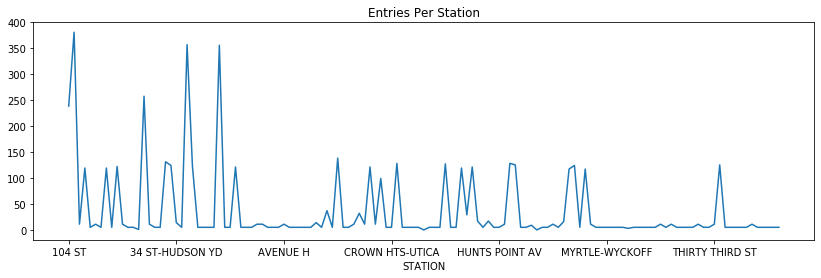

In [59]:
plt.figure(figsize = [14,4])
entries_station.plot( use_index = True, y='diff', title= "Entries Per Station");

From the above chart we can deduce that stations 104 ST and ST-Hudson have the most entries, while Avenue H station has the least 

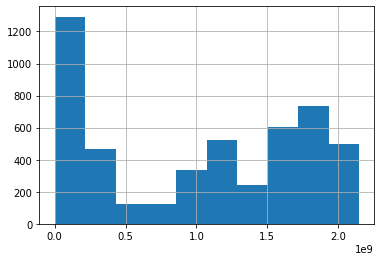

In [80]:
df['ENTRIES'].hist()

the frequency of the entries that are above 1200 is high, on the other hand the frequency of people entering to the train stations below 200 is very low